In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model_df=pd.read_csv('./home_credit_data/model_df.csv')

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

In [9]:
from sklearn.model_selection import train_test_split
decision_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)

X=model_df[['EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_2','bureau_DAYS_CREDIT_mean', 'CREDIT_ACTIVE_Closed_count_norm','CREDIT_ACTIVE_Active_count_norm','DAYS_BIRTH','DAYS_BIRTH_GROUP','bureau_DAYS_CREDIT_min','bureau_DAYS_CREDIT_UPDATE_mean','DAYS_EMPLOYED','CREDIT_ACTIVE_Active_count','OWN_CAR_AGE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','BASEMENTAREA_MEDI','LIVINGAREA_AVG','bureau_DAYS_ENDDATE_FACT_min','bureau_DAYS_ENDDATE_FACT_sum','BASEMENTAREA_AVG','bureau_DAYS_CREDIT_ENDDATE_sum','LIVINGAREA_MEDI','BASEMENTAREA_MODE','bureau_DAYS_CREDIT_max','TOTALAREA_MODE','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','FLAG_EMP_PHONE','LIVINGAREA_MODE','bureau_DAYS_CREDIT_sum','APARTMENTS_AVG','bureau_DAYS_CREDIT_UPDATE_sum','APARTMENTS_MODE','bureau_DAYS_ENDDATE_FACT_mean','APARTMENTS_MEDI','CREDIT_TYPE_Microloan_count_norm','bureau_DAYS_CREDIT_ENDDATE_mean','REG_CITY_NOT_WORK_CITY','bureau_DAYS_CREDIT_UPDATE_min','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','bureau_DAYS_CREDIT_ENDDATE_min','FLOORSMAX_AVG','CREDIT_TYPE_Credit card_count_norm','AMT_CREDIT','FLOORSMAX_MEDI','CREDIT_TYPE_Credit card_count','ELEVATORS_AVG','FLOORSMAX_MODE']]
y = model_df.TARGET

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

decision_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=1,
                       random_state=1337)

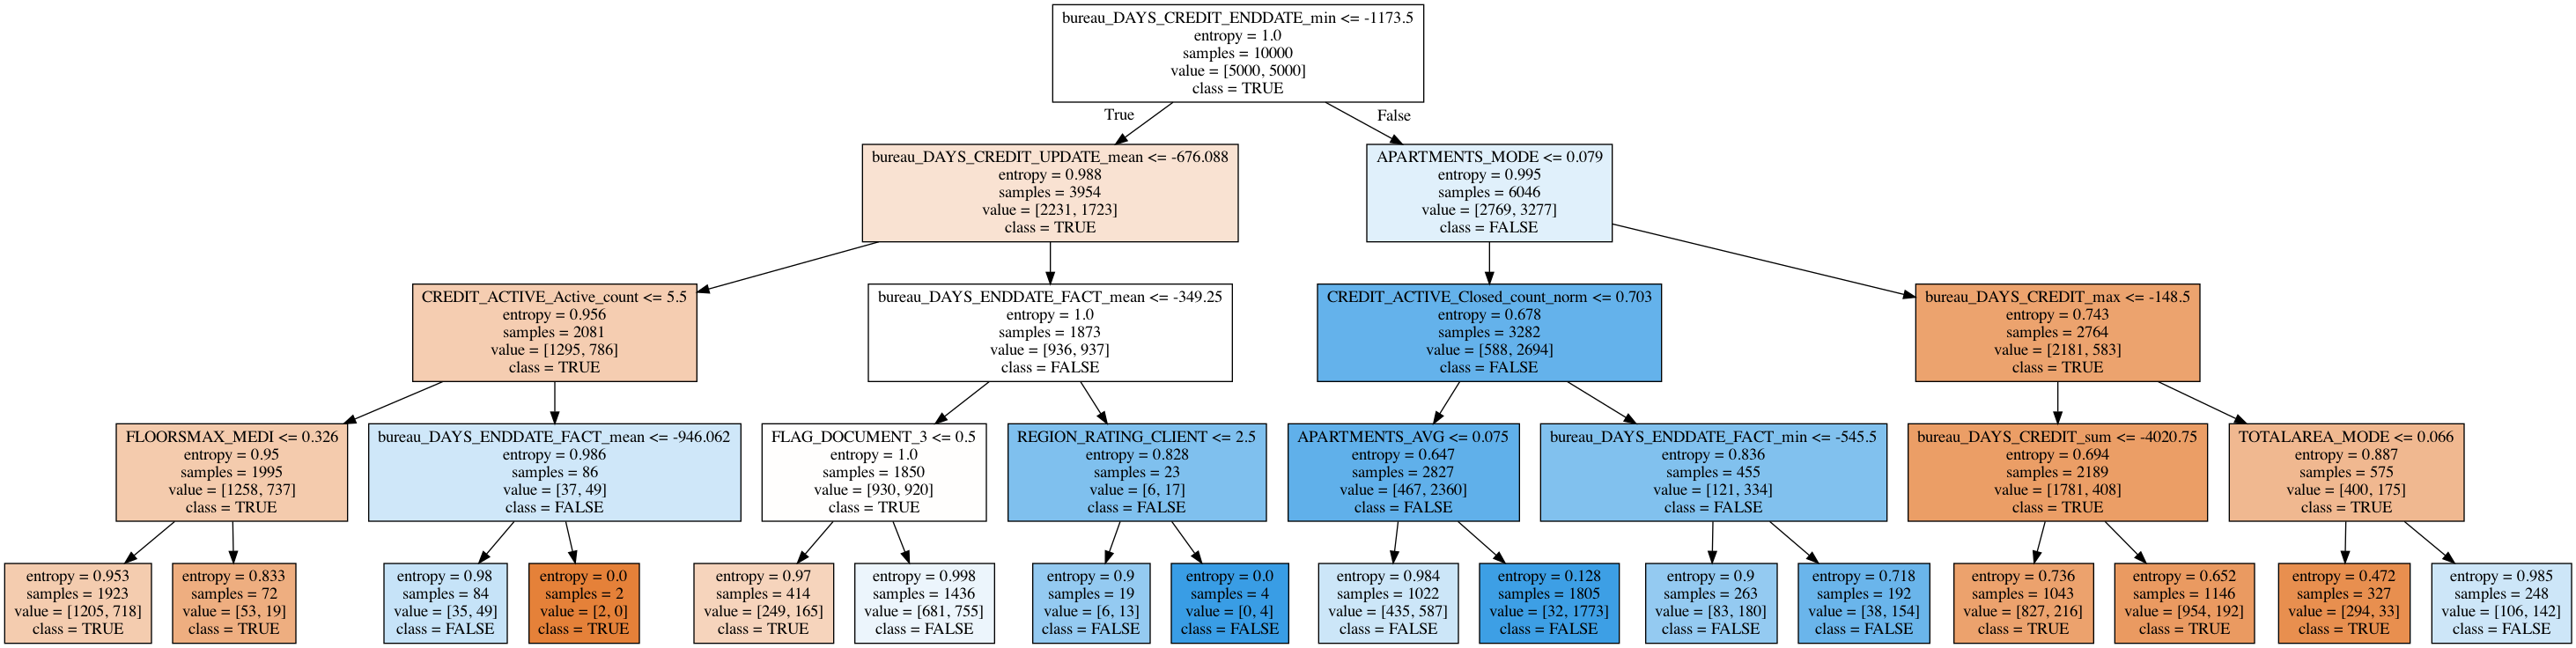

In [7]:
tree_data = export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['TRUE', 'FALSE'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(tree_data)
Image(graph.create_png())

In [10]:
from sklearn.metrics import accuracy_score
y_predict = decision_tree.predict(X_test)

In [12]:
print("Decision Tree Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_predict)))

Decision Tree Accuracy Score : 0.72


## GridSearch - RandomizedSearch